<h1>День 1. Создание витрин и моделей. Простое целевое событие.</h1>

<h3>Сервисный модуль</h3>
<b><i>Пожалуйста, запустите следующие несколько ячеек при первом запуске ноутбука!</i></b>

In [592]:
import warnings
warnings.filterwarnings('ignore')

In [593]:
#%pip install -r '/home/jupyter/work/resources/a2nced/requirements.txt'

<b>Пожалуйста, перезагрузите ядро, чтобы убедиться, что все зависимости корректно прописались</b><br>
<br>
<img src="photo_2022-11-18_10-36-44.jpg" alt="как перезагрузить ядро">


In [594]:
import os
import sys
from pathlib import Path
dir_path = Path(os.getcwd()).resolve().parent.as_posix()
sys.path.append(dir_path)

<h3>Конец сервисного модуля</h3>

<br>
<h1><b>Практика 1</b></h1>
<h3>Знакомимся с данными</h3>

In [595]:
# необходимые импорты
import pandas as pd
import numpy as np
import datetime as dt

In [596]:
# найдем директорию, в которой хранятся наши данные
_PATH = '/home/jupyter/mnt/s3/course-test/day_1/'

In [597]:
# укажем пути до конкретных файлов
transactions_path = os.path.join(_PATH, 'day_1_transactions.csv') # транзакции
demographics_path = os.path.join(_PATH, 'day_1_demogr.csv') # информация о клиентах
prod_path         = os.path.join(_PATH, 'day_1_product.csv') # информация о товарах
commun_path       = os.path.join(_PATH, 'day_1_campaign_table.csv') # информация о коммуникациях

In [598]:
demographics = pd.read_csv(demographics_path)
prod_df = pd.read_csv(prod_path)

<h4>Анкетные данные</h4>

In [599]:
demographics.head()

user_id age_desc income_desc have_own_house  num_adults adult_gender  \
0        1      65+      35-49K           True         2.0          NaN   
1        7    45-54      50-74K           True         2.0          NaN   
2        8    25-34      25-34K            NaN         2.0          NaN   
3       13    25-34      75-99K           True         2.0          NaN   
4       16    45-54      50-74K           True         1.0            F   

   no_kids size  
0     True    2  
1     True    2  
2    False    3  
3    False    4  
4     True    1

In [600]:
# загрузим данные
transactions_df = pd.read_csv(transactions_path)
transactions_df['purch_date_time'] = transactions_df['purch_date_time'].astype(np.datetime64)

<h4>Транзакции</h4>

In [601]:
transactions_df.head()

user_id     purch_date_time    basket_id  product_id  quantity  \
0     2375 2018-07-31 17:31:00  26984851472     1004906         1   
1     2375 2018-07-31 17:31:00  26984851472     1033142         1   
2     2375 2018-07-31 17:31:00  26984851472     1036325         1   
3     2375 2018-07-31 17:31:00  26984851472     1082185         1   
4     2375 2018-07-31 17:31:00  26984851472     8160430         1   

   sales_value  retail_disc  default_price  
0         1.39        -0.60           1.99  
1         0.82         0.00           0.82  
2         0.99        -0.30           1.29  
3         1.21         0.00           1.21  
4         1.50        -0.39           1.89

In [602]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          int64         
 1   purch_date_time  datetime64[ns]
 2   basket_id        int64         
 3   product_id       int64         
 4   quantity         int64         
 5   sales_value      float64       
 6   retail_disc      float64       
 7   default_price    float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 158.4 MB


In [603]:
prod_df.head()

product_id  manufacturer    department     brand            commodity_desc  \
0       25671             2       GROCERY  National                  FRZN ICE   
1       26081             2  MISC. TRANS.  National  NO COMMODITY DESCRIPTION   
2       26093            69        PASTRY   Private                     BREAD   
3       26190            69       GROCERY   Private      FRUIT - SHELF STABLE   
4       26355            69       GROCERY   Private             COOKIES/CONES   

            sub_commodity_desc curr_size_of_product  
0          ICE - CRUSHED/CUBED                22 LB  
1  NO SUBCOMMODITY DESCRIPTION                       
2         BREAD:ITALIAN/FRENCH                       
3                  APPLE SAUCE                50 OZ  
4            SPECIALTY COOKIES                14 OZ

<h4>Коммуникации</h4>

In [604]:
commun_df = pd.read_csv(commun_path)

In [605]:
commun_df.head()

description  user_id  campaign
0       TypeA       17        26
1       TypeA       27        26
2       TypeA      212        26
3       TypeA      208        26
4       TypeA      192        26

<br>
<h1><b>Практика 2</b></h1>
<h3>Предобработка данных и стратификация</h3>

In [606]:
# для начала, немного обогатим наши данные - соберем информацию о первом заказе клиента
df = demographics.copy()
first_orders = transactions_df.groupby('user_id').purch_date_time.min().reset_index().rename({'purch_date_time':'first_order'},
                                                                                           axis=1)

# определим, сколько дней прошло с первого заказа
first_orders['recency'] = (first_orders.first_order - first_orders.first_order.min()).dt.days

# распределим их по бинам
first_orders['recency_bin'] = pd.qcut(first_orders['recency'],
                                      q = 5,
                                     labels=['a', 'b', 'c', 'd', 'e'])

In [607]:
first_orders.head()

user_id         first_order  recency recency_bin
0        1 2018-09-19 15:56:00       50           b
1        2 2018-11-10 20:04:00      102           e
2        3 2018-11-20 16:49:00      112           e
3        4 2018-11-11 15:52:00      103           e
4        5 2018-10-23 16:40:00       84           d

In [608]:
df = df.merge(first_orders[['user_id', 'recency_bin']], how='left')

In [609]:
df.head()

user_id age_desc income_desc have_own_house  num_adults adult_gender  \
0        1      65+      35-49K           True         2.0          NaN   
1        7    45-54      50-74K           True         2.0          NaN   
2        8    25-34      25-34K            NaN         2.0          NaN   
3       13    25-34      75-99K           True         2.0          NaN   
4       16    45-54      50-74K           True         1.0            F   

   no_kids size recency_bin  
0     True    2           b  
1     True    2           a  
2    False    3           c  
3    False    4           d  
4     True    1           d

In [610]:
size_vals = {'1': 'xs',
          '2':'s',
          '3':'m',
          '4':'l',
         '5+':'xl'}

df['f_size'] = df['size'].map(size_vals)

In [611]:
df.drop('size', axis=1, inplace=True)

In [612]:
df['recency_bin'] = df['recency_bin'].astype('object') # многие библиотеки не вполне корректно работают с типом category, лучше преобразовать его в object

In [613]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.cluster import KMeans



# напишем небольшой пайплайн, который поможет нам подготовить данные к кластеризации
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),    
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


cat_features = ['age_desc', 'income_desc', 'have_own_house',
               'adult_gender', 'f_size', 'no_kids', 'recency_bin']
num_features = ['num_adults']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, num_features),
        ('categorical', categorical_transformer, cat_features)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clustering', KMeans(n_clusters=10, random_state=42))
])

<h4>Формирование групп клиентов</h4>

In [614]:
# запустим процесс 

df['strata'] = model.fit_predict(df.drop(['user_id'], axis=1))
df.head()

user_id age_desc income_desc have_own_house  num_adults adult_gender  \
0        1      65+      35-49K           True         2.0          NaN   
1        7    45-54      50-74K           True         2.0          NaN   
2        8    25-34      25-34K            NaN         2.0          NaN   
3       13    25-34      75-99K           True         2.0          NaN   
4       16    45-54      50-74K           True         1.0            F   

   no_kids recency_bin f_size  strata  
0     True           b      s       0  
1     True           a      s       0  
2    False           c      m       4  
3    False           d      l       3  
4     True           d     xs       1

In [615]:
# опишем функцию, которая позволит нам балансировать выборки
def create_stratified_sample(df:pd.DataFrame, column_name:str,
                            test_size:float,
                            control_test_ratio:float=1.0) -> tuple:
    """
    Args:
    =====
    df: pd.DataFrame
    initial dataframe
    
    column_name: str
    column name, using for stratification
    
    test_size: float, range (0.0, 1.0)
    size of test sample as a part of the population
    
    control_test_ratio: float (Default 1.0)
    size of contol sample as test_size * control_test_ratio. By default test and
    control samples have same size
    """
    if test_size > 1:
        raise KeyError('use floats from range (0.0, 1.0)')
    # number of items in test sample
    n = int(df.shape[0] * test_size) + 1
    test_df = df.sample(n)
    
    control_df = pd.DataFrame(columns = test_df.columns.values)
    
    num_groups = test_df[column_name].nunique()

    for i in range(num_groups):
        m = int(test_df[test_df[column_name]== i].shape[0] * control_test_ratio)
        control = df[(~df.user_id.isin(test_df.user_id.values)) &\
                     (df[column_name] == i)].sample(m)
        control_df = pd.concat([control_df, control], axis=0)
        
    return(test_df,
          control_df)

In [616]:
test_df, control_df = create_stratified_sample(df, 'strata', 0.1)

In [617]:
# убедимся, что выборки получились одинаковыми
test_out = test_df.strata.value_counts()
control_out = control_df.strata.value_counts()

In [618]:
samples = test_out.to_frame()
samples.rename({'strata':'test_group'}, axis=1, inplace=True)
samples = samples.merge(control_out, left_index=True, right_index=True)

In [619]:
samples.rename({'strata':'control_group'}, axis=1, inplace=True)

In [620]:
samples.sort_index().head(10)

test_group  control_group
0          12             12
1           8              8
2           6              6
3          13             13
4          11             11
5          12             12
6           3              3
7           7              7
8           2              2
9           7              7

<br>
<h1>Практика 3</h1>
<h3>Сбор агрегированных данных</h3>
<br>
<h4>Объединение данных из нескольких источников</h4>

In [621]:
# сгруппируем информацию о покупках по заказам.
orders_df = transactions_df.groupby(['user_id',
                                     'basket_id',
                                     'purch_date_time'])[['quantity',
                                                          'sales_value',
                                                          'retail_disc',
                                                          'default_price']].sum().reset_index()

In [622]:
# теперь у нас есть выборка с информацией о заказах для каждого пользователя:
# дата, количество единиц товаров, их суммарная стоимость и размер скидки
orders_df.sample(5)

user_id    basket_id     purch_date_time  quantity  sales_value  \
117661     1058  29141775906 2019-01-09 12:26:00         3         2.23   
25480       235  34642446698 2019-12-13 15:16:00     16271        47.17   
254264     2294  33132726151 2019-09-20 15:56:00         9        14.92   
206242     1860  30943235603 2019-04-20 13:30:00         4         5.23   
170749     1540  41506364816 2020-05-12 19:09:00        12        14.21   

        retail_disc  default_price  
117661        -1.72           3.95  
25480         -1.63          48.80  
254264        -3.71          18.63  
206242        -0.31           5.54  
170749        -2.77          16.98

In [623]:
# у нас есть информация не обо всех клиентах магазина - поэтому необходимо оставить лишь заказы тех, о ком есть демогр сведения
print(f"Пользователей, для которых есть соц.дем. характеристики - {demographics['user_id'].nunique()}.")
print(f"Пользователей, которые совершали заказы в магазине - {transactions_df['user_id'].nunique()}.")

Пользователей, для которых есть соц.дем. характеристики - 801.
Пользователей, которые совершали заказы в магазине - 2500.


In [624]:
# отфильтруем их и положим резльтат в переменную
available_ids = demographics['user_id'].values

<h4>Агрегирование данных</h4>

In [625]:
# используем встроенную функцию в pandas

In [626]:
# выберем даты, соответствующие нашим окнам для сбора агрегатов
end_date = dt.datetime.strptime('2019-07-01', '%Y-%m-%d')
# 14 дней
start_14_days = end_date - dt.timedelta(days=14) 
# 30 дней
start_30_days = end_date - dt.timedelta(days=30) 
# 60 дней
start_60_days = end_date - dt.timedelta(days=60) 

In [627]:
# определим функции, которых нет в Pandas
def vals_range(x:np.array, axis:int=0):
    return(np.max(x, axis=axis) - np.min(x, axis=axis))


def quantile_25(x:np.array):
    return(x.quantile(q=.25))


def quantile_75(x:np.array):
    return(x.quantile(q=.75))


def interquantile_range(x:np.array):
    return(quantile_75(x) - quantile_25(x))


def skewness(x:np.array):
    return(x.skew())

In [628]:
# соберем агрегаты с помощью метода agg, предварительно отфильтровав нужные данные
# для начала, за две недели
agg_features_14 = orders_df.loc[(orders_df.user_id.isin(available_ids)) &\
              (orders_df.purch_date_time >= start_14_days) &\
              (orders_df.purch_date_time <= end_date)].\
groupby('user_id')[['quantity', 'sales_value', 'retail_disc', 'default_price']].\
agg(['min', 'max', 'mean', 'median', 'std', 'sum', vals_range,
    quantile_25, quantile_75, interquantile_range, skewness], axis=1).reset_index()

In [629]:
agg_features_14.head()

user_id quantity                                                          \
               min    max     mean  median           std    sum vals_range   
0       1       29     29    29.00    29.0           NaN     29          0   
1       7       40     52    46.00    46.0      8.485281     92         12   
2       8       18     23    20.50    20.5      3.535534     41          5   
3      13        6  21647  8995.25  7164.0  10788.398163  35981      21641   
4      16        3     11     5.25     3.5      3.862210     21          8   

                           ... default_price                               \
  quantile_25 quantile_75  ...           max     mean   median        std   
0       29.00       29.00  ...         73.28   73.280   73.280        NaN   
1       43.00       49.00  ...        118.80  102.060  102.060  23.673935   
2       19.25       21.75  ...         76.19   75.960   75.960   0.325269   
3       29.25    16130.00  ...         96.17   49.075   38.725  32.756997   
4        3.00        5.75  ...         30.20   15.665   12.545  10.382936   

                                                                            
      sum vals_range quantile_25 quantile_75 interquantile_range  skewness  
0   73.28       0.00     73.2800     73.2800               0.000       NaN  
1  204.12      33.48     93.6900    110.4300              16.740       NaN  
2  151.92       0.46     75.8450     76.0750               0.230       NaN  
3  196.30      73.49     29.6775     58.1225              28.445  1.537210  
4   62.66      22.83      8.6600     19.5500              10.890  1.319709  

[5 rows x 45 columns]

In [630]:
# приведем в порядок названия столбцов и посмотрим на результат
agg_features_14.columns = agg_features_14.columns.to_flat_index().str.join('_')
agg_features_14.head()

user_id_  quantity_min  quantity_max  quantity_mean  quantity_median  \
0         1            29            29          29.00             29.0   
1         7            40            52          46.00             46.0   
2         8            18            23          20.50             20.5   
3        13             6         21647        8995.25           7164.0   
4        16             3            11           5.25              3.5   

   quantity_std  quantity_sum  quantity_vals_range  quantity_quantile_25  \
0           NaN            29                    0                 29.00   
1      8.485281            92                   12                 43.00   
2      3.535534            41                    5                 19.25   
3  10788.398163         35981                21641                 29.25   
4      3.862210            21                    8                  3.00   

   quantity_quantile_75  ...  default_price_max  default_price_mean  \
0                 29.00  ...              73.28              73.280   
1                 49.00  ...             118.80             102.060   
2                 21.75  ...              76.19              75.960   
3              16130.00  ...              96.17              49.075   
4                  5.75  ...              30.20              15.665   

   default_price_median  default_price_std  default_price_sum  \
0                73.280                NaN              73.28   
1               102.060          23.673935             204.12   
2                75.960           0.325269             151.92   
3                38.725          32.756997             196.30   
4                12.545          10.382936              62.66   

   default_price_vals_range  default_price_quantile_25  \
0                      0.00                    73.2800   
1                     33.48                    93.6900   
2                      0.46                    75.8450   
3                     73.49                    29.6775   
4                     22.83                     8.6600   

   default_price_quantile_75  default_price_interquantile_range  \
0                    73.2800                              0.000   
1                   110.4300                             16.740   
2                    76.0750                              0.230   
3                    58.1225                             28.445   
4                    19.5500                             10.890   

   default_price_skewness  
0                     NaN  
1                     NaN  
2                     NaN  
3                1.537210  
4                1.319709  

[5 rows x 45 columns]

In [631]:
# точно так же соберем агрегаты за 30 и 60 дней
agg_features_30 = orders_df.loc[(orders_df.user_id.isin(available_ids)) &\
              (orders_df.purch_date_time >= start_30_days) &\
              (orders_df.purch_date_time <= end_date)].\
groupby('user_id')[['quantity', 'sales_value', 'retail_disc', 'default_price']].\
agg(['min', 'max', 'mean', 'median', 'std', 'sum', vals_range,
    quantile_25, quantile_75, interquantile_range, skewness], axis=1).reset_index()
agg_features_30.columns = agg_features_30.columns.to_flat_index().str.join('_')


agg_features_60 = orders_df.loc[(orders_df.user_id.isin(available_ids)) &\
              (orders_df.purch_date_time >= start_60_days) &\
              (orders_df.purch_date_time <= end_date)].\
groupby('user_id')[['quantity', 'sales_value', 'retail_disc', 'default_price']].\
agg(['min', 'max', 'mean', 'median', 'std', 'sum', vals_range,
    quantile_25, quantile_75, interquantile_range, skewness], axis=1).reset_index()
agg_features_60.columns = agg_features_60.columns.to_flat_index().str.join('_')

In [632]:
# поправим обратно название столбца user_id
agg_features_14.rename({'user_id_':'user_id'}, axis=1, inplace=True)
agg_features_30.rename({'user_id_':'user_id'}, axis=1, inplace=True)
agg_features_60.rename({'user_id_':'user_id'}, axis=1, inplace=True)

In [633]:
# начнем собирать наши данные в выборку для обучения
# исходные данные
df = demographics[['user_id', 'age_desc', 'income_desc', 'no_kids']]
# столбцы для фильтрации
common_cols = ['user_id', 'age_desc', 'income_desc', 'no_kids']

In [634]:
# сгенерируем нормальные названия при объединении матриц с агрегатами
agg_features_14.columns = agg_features_14.columns.map(lambda x: f'{x}_14_days' if x not in common_cols else str(x))
agg_features_30.columns = agg_features_30.columns.map(lambda x: f'{x}_30_days' if x not in common_cols else str(x))
agg_features_60.columns = agg_features_60.columns.map(lambda x: f'{x}_60_days' if x not in common_cols else str(x))
df = df.merge(agg_features_14, how='left')
df = df.merge(agg_features_30, how='left')
df = df.merge(agg_features_60, how='left')
df.head()

user_id age_desc income_desc  no_kids  quantity_min_14_days  \
0        1      65+      35-49K     True                  29.0   
1        7    45-54      50-74K     True                  40.0   
2        8    25-34      25-34K    False                  18.0   
3       13    25-34      75-99K    False                   6.0   
4       16    45-54      50-74K     True                   3.0   

   quantity_max_14_days  quantity_mean_14_days  quantity_median_14_days  \
0                  29.0                  29.00                     29.0   
1                  52.0                  46.00                     46.0   
2                  23.0                  20.50                     20.5   
3               21647.0                8995.25                   7164.0   
4                  11.0                   5.25                      3.5   

   quantity_std_14_days  quantity_sum_14_days  ...  default_price_max_60_days  \
0                   NaN                  29.0  ...                      95.05   
1              8.485281                  92.0  ...                     118.80   
2              3.535534                  41.0  ...                     124.93   
3          10788.398163               35981.0  ...                     145.33   
4              3.862210                  21.0  ...                      51.53   

   default_price_mean_60_days  default_price_median_60_days  \
0                   54.868571                        57.680   
1                   59.892500                        54.245   
2                   62.680000                        73.440   
3                   45.659167                        35.010   
4                   16.758235                        14.050   

   default_price_std_60_days  default_price_sum_60_days  \
0                  34.626479                     384.08   
1                  50.767915                     239.57   
2                  34.662260                     564.12   
3                  39.930750                    1095.82   
4                  11.825218                     284.89   

   default_price_vals_range_60_days  default_price_quantile_25_60_days  \
0                             81.10                            24.7850   
1                            106.52                            20.4475   
2                            106.35                            36.7600   
3                            141.50                            11.2525   
4                             47.55                             8.1700   

   default_price_quantile_75_60_days  \
0                             83.915   
1                             93.690   
2                             76.190   
3                             61.880   
4                             22.650   

   default_price_interquantile_range_60_days  default_price_skewness_60_days  
0                                    59.1300                       -0.028126  
1                                    73.2425                        0.323010  
2                                    39.4300                        0.322709  
3                                    50.6275                        1.043917  
4                                    14.4800                        1.661255  

[5 rows x 136 columns]

<br>
<h1>Практика 4</h1>
<h3>Предобработка данных перед обучением модели</h3>
<br>
<h4>Разметка целевого события</h4>
Покупка определенного товара в течение двух недель от даты витрины

In [635]:
start_period = dt.datetime.strptime('2019-07-01', '%Y-%m-%d') + dt.timedelta(days=1)
end_period =  dt.datetime.strptime('2019-07-01', '%Y-%m-%d')  + dt.timedelta(days=14)

In [636]:
product_id = 1029743 # выберем популярный продукт
target_mask = ((transactions_df['user_id'].isin(available_ids)) &\
              (transactions_df['purch_date_time'] >= start_period) &\
              (transactions_df['purch_date_time'] <= end_period) &\
              (transactions_df['product_id'] == product_id))

target = pd.DataFrame()
target['user_id'] = transactions_df.loc[target_mask]['user_id'].unique()

# маркируем целевое действие - совершение покупки
target['y'] = 1

In [637]:
df = df.merge(target, how='left', on='user_id')

df['y'] = df['y'].fillna(0)
df['y'] = df['y'].astype('int8')

y = df['y']
X = df.drop(columns=['y', 'user_id'], axis=1)

In [638]:
y.value_counts()

0    704
1     97
Name: y, dtype: int64

<h3>Домашнее задание 1</h3>
<br>
Для полученной выборки разметьте таргет<br>
Целевое событие: покупка клиентом товара с id 1029743 в период трех недель от даты витрины.

<b><i>Подсказка:</i></b> Для выполнения домашнего задания сделайте копию блокнота (File->Make a Copy) и все изменения и эксперименты проводите в нем.

<h3>Домашнее задание 2</h3>
<br>
Для полученной выборки разметьте таргет<br>
Целевое событие: две или более покупок клиентом товара с id 1029743 в период двух недель от даты витрины.<br>
<b><i>Подсказка:</i></b> товары должды быть в разных чеках.

<h3>Домашнее задание 3</h3>
<br>
Для полученной выборки разметьте таргет<br>
Целевое событие: две или более покупок клиентом в категориях 'MEAT', 'MEAT-WHSE', 'MEAT-PCKGD' или 'PORK' в период двух недель от даты витрины (товары должды быть в разных чеках).<br>
<b><i>Подсказка:</i></b> чтобы определить категорию товара используйте поле 'department' в наборе данных prod_df.

<h4>Разделение выборок на обучающую и тестовую</h4>

In [639]:
from sklearn.model_selection import train_test_split

In [640]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

<h4>Разделение атрибутов на числовые и категориальные</h4>

In [641]:
categorical_features = X_train.select_dtypes(exclude=['Int64', 'float64']).columns.values
numeric_features = [feature for feature in list(X.columns) if feature not in categorical_features]

<h4>Балансировка классов (Oversampling)</h4>

In [642]:
from imblearn.over_sampling import SMOTENC
columns = list(X.columns)
cat_features_idx = [columns.index(feature) for feature in categorical_features]
smote_nc = SMOTENC(categorical_features=cat_features_idx, sampling_strategy=0.25, random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X_train.fillna(0), y_train) 

<br>
<h1>Практика 5</h1>
<h3>Подбор оптимальных значений гиперпараметров и обучение модели</h3>
<br>
<h4>Вычисление ROC-AUC</h4>

In [643]:
from utils.models import create_pipeline, search_space, param_search, unpack_model_params
from lightgbm import LGBMClassifier

In [644]:
categorical_features = X_train.select_dtypes(exclude=['Int64', 'float64']).columns.values
numeric_features = [feature for feature in list(X.columns) if feature not in categorical_features]

<h4>Обучение модели</h4>

In [645]:
pipeline_resampled = create_pipeline(cat_features=categorical_features,
                                     numer_features=numeric_features,
                                     model=LGBMClassifier(objective = "binary", random_state = 42))

In [646]:
best_resampled = param_search(pipeline_resampled , X_resampled, y_resampled, search_space)

 87%|████████▋ | 87/100 [02:15<00:17,  1.33s/trial, best loss: -0.8678639608663532][LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
100%|██████████| 100/100 [02:35<00:00,  1.56s/trial, best loss: -0.8678639608663532]


In [647]:
best_params_resampled = unpack_model_params(best_resampled)

In [648]:
pipeline_resampled.set_params(**best_params_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['quantity_min_14_days',
                                                   'quantity_max_14_days',
                                                   'quantity_mean_14_days',
                                                   'quantity_median_14_days',
                                                   'quantity_std_14_days',
                                                   'quantity_sum_14_days',
                                                   'quantity_vals_range_14_days',
                                                   'quantity_quantile_25_14_day...
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['age_desc', 'income_desc', 'no_kids'], dtype=object))])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.2977779877211083, max_depth=8,
                                n_estimators=750, n_jobs=8, num_leaves=90,
                                objective='binary', random_state=42,
                                reg_alpha=0.11400686065558072,
                                reg_lambda=0.8511343405435967))])

In [649]:
pipeline_resampled.fit(X_resampled, y_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['quantity_min_14_days',
                                                   'quantity_max_14_days',
                                                   'quantity_mean_14_days',
                                                   'quantity_median_14_days',
                                                   'quantity_std_14_days',
                                                   'quantity_sum_14_days',
                                                   'quantity_vals_range_14_days',
                                                   'quantity_quantile_25_14_day...
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['age_desc', 'income_desc', 'no_kids'], dtype=object))])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.2977779877211083, max_depth=8,
                                n_estimators=750, n_jobs=8, num_leaves=90,
                                objective='binary', random_state=42,
                                reg_alpha=0.11400686065558072,
                                reg_lambda=0.8511343405435967))])

In [650]:
y_pred_resampled = pipeline_resampled.predict(X_test)

In [651]:
prob_pred_resampled = pipeline_resampled.predict_proba(X_test)

In [652]:
from sklearn.metrics import accuracy_score, plot_roc_curve
print(f'Accuracy: {accuracy_score(y_test, y_pred_resampled)}')

Accuracy: 0.835820895522388


<h4>Построение ROC-кривой</h4>

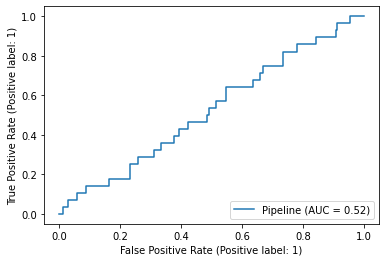

In [653]:
# порог установлен на 0.5
plot_roc_curve(pipeline_resampled, X_test, y_test)

<h4>Оценка качества модели на отложенной выборке (OOT - out of time)</h4>

In [654]:
# соберем и запустим функцию, которая нам еще пригодится в дальнейшем
def get_feature_matrix(orders_df:pd.DataFrame,
                      date:str,
                      period_1:int=14,
                      period_2:int=30,
                      period_3:int=60,
                      demogr_df:pd.DataFrame=demographics) -> pd.DataFrame:
    end_date = dt.datetime.strptime(date, '%Y-%m-%d')
    # period_1 (14 дней)
    start_14_days = end_date - dt.timedelta(days=14) 
    # period_2 (30 дней)
    start_30_days = end_date - dt.timedelta(days=30) 
    # period_3 (60 дней)
    start_60_days = end_date - dt.timedelta(days=60)
    agg_features_14 = orders_df.loc[(orders_df.user_id.isin(available_ids)) &\
              (orders_df.purch_date_time >= start_14_days) &\
              (orders_df.purch_date_time <= end_date)].\
    groupby('user_id')[['quantity', 'sales_value', 'retail_disc', 'default_price']].\
    agg(['min', 'max', 'mean', 'median', 'std', 'sum', vals_range,
        quantile_25, quantile_75, interquantile_range, skewness], axis=1).reset_index()
    agg_features_14.columns = agg_features_14.columns.to_flat_index().str.join('_')
    
    agg_features_30 = orders_df.loc[(orders_df.user_id.isin(available_ids)) &\
                  (orders_df.purch_date_time >= start_30_days) &\
                  (orders_df.purch_date_time <= end_date)].\
    groupby('user_id')[['quantity', 'sales_value', 'retail_disc', 'default_price']].\
    agg(['min', 'max', 'mean', 'median', 'std', 'sum', vals_range,
        quantile_25, quantile_75, interquantile_range, skewness], axis=1).reset_index()
    agg_features_30.columns = agg_features_30.columns.to_flat_index().str.join('_')


    agg_features_60 = orders_df.loc[(orders_df.user_id.isin(available_ids)) &\
                  (orders_df.purch_date_time >= start_60_days) &\
                  (orders_df.purch_date_time <= end_date)].\
    groupby('user_id')[['quantity', 'sales_value', 'retail_disc', 'default_price']].\
    agg(['min', 'max', 'mean', 'median', 'std', 'sum', vals_range,
        quantile_25, quantile_75, interquantile_range, skewness], axis=1).reset_index()
    agg_features_60.columns = agg_features_60.columns.to_flat_index().str.join('_')
    
    agg_features_14.rename({'user_id_':'user_id'}, axis=1, inplace=True)
    agg_features_30.rename({'user_id_':'user_id'}, axis=1, inplace=True)
    agg_features_60.rename({'user_id_':'user_id'}, axis=1, inplace=True)
    
    df = demogr_df[['user_id', 'age_desc', 'income_desc', 'no_kids']]
    common_cols = ['user_id',]
    
    agg_features_14.columns = agg_features_14.columns.map(lambda x: f'{x}_14_days' if x not in common_cols else str(x))
    agg_features_30.columns = agg_features_30.columns.map(lambda x: f'{x}_30_days' if x not in common_cols else str(x))
    agg_features_60.columns = agg_features_60.columns.map(lambda x: f'{x}_60_days' if x not in common_cols else str(x))
    df = df.merge(agg_features_14, how='left')
    df = df.merge(agg_features_30, how='left')
    return(df.merge(agg_features_60, how='left'))
    

In [655]:
# Используем функцию, чтобы собрать агрегаты
end_date_oot = '2019-07-15'

In [656]:
df_oot = get_feature_matrix(orders_df,
                            end_date_oot)

In [657]:
df_oot.head()

user_id age_desc income_desc  no_kids  quantity_min_14_days  \
0        1      65+      35-49K     True                  58.0   
1        7    45-54      50-74K     True                   NaN   
2        8    25-34      25-34K    False                  22.0   
3       13    25-34      75-99K    False                   1.0   
4       16    45-54      50-74K     True                   7.0   

   quantity_max_14_days  quantity_mean_14_days  quantity_median_14_days  \
0                  58.0              58.000000                     58.0   
1                   NaN                    NaN                      NaN   
2                  71.0              46.500000                     46.5   
3               25378.0            9923.166667                   7522.0   
4                  16.0              11.500000                     11.5   

   quantity_std_14_days  quantity_sum_14_days  ...  default_price_max_60_days  \
0                   NaN                  58.0  ...                     130.76   
1                   NaN                   NaN  ...                     118.80   
2             34.648232                  93.0  ...                     141.55   
3          11334.801461               59539.0  ...                     132.05   
4              6.363961                  23.0  ...                      51.53   

   default_price_mean_60_days  default_price_median_60_days  \
0                   77.798333                        83.915   
1                   59.892500                        54.245   
2                   73.152500                        68.050   
3                   47.748400                        38.180   
4                   17.091875                        14.480   

   default_price_std_60_days  default_price_sum_60_days  \
0                  39.225401                     466.79   
1                  50.767915                     239.57   
2                  41.777238                     585.22   
3                  36.557556                    1193.71   
4                  12.332405                     273.47   

   default_price_vals_range_60_days  default_price_quantile_25_60_days  \
0                            115.29                            61.5800   
1                            106.52                            20.4475   
2                            121.19                            46.1875   
3                            128.22                            22.6800   
4                             47.55                             7.9700   

   default_price_quantile_75_60_days  \
0                            94.9250   
1                            93.6900   
2                            88.3750   
3                            61.3100   
4                            23.2525   

   default_price_interquantile_range_60_days  default_price_skewness_60_days  
0                                    33.3450                       -0.457207  
1                                    73.2425                        0.323010  
2                                    42.1875                        0.647567  
3                                    38.6300                        0.898713  
4                                    15.2825                        1.510367  

[5 rows x 136 columns]

In [658]:
# таргет для оот

In [659]:
start_period = dt.datetime.strptime('2019-07-15', '%Y-%m-%d') + dt.timedelta(days=1)
end_period =  dt.datetime.strptime('2019-07-15', '%Y-%m-%d')  + dt.timedelta(days=14)

In [660]:
product_id = 1029743
target_mask = ((transactions_df['user_id'].isin(available_ids)) &\
              (transactions_df['purch_date_time'] >= start_period) &\
              (transactions_df['purch_date_time'] <= end_period) &\
              (transactions_df['product_id'] == product_id))

target = pd.DataFrame()
target['user_id'] = transactions_df.loc[target_mask]['user_id'].unique()

# маркируем целевое действие - совершение покупки
target['y'] = 1

In [661]:
df_oot = df_oot.merge(target, how='left', on='user_id')

df_oot['y'] = df_oot['y'].fillna(0)
df_oot['y'] = df_oot['y'].astype('int8')

y_oot = df_oot['y']
X_oot = df_oot.drop(columns=['y', 'user_id'], axis=1)

In [662]:
y_oot.value_counts()

0    698
1    103
Name: y, dtype: int64

In [663]:
y_pred_resampled = pipeline_resampled.predict(X_oot)

In [664]:
prob_pred_resampled = pipeline_resampled.predict_proba(X_oot)

In [665]:
print(f'Accuracy: {accuracy_score(y_oot, y_pred_resampled)}')

Accuracy: 0.8426966292134831


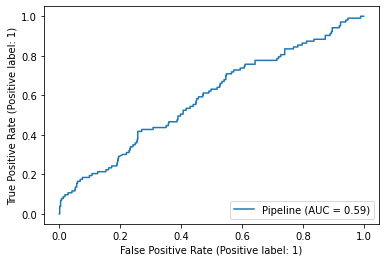

In [666]:
plot_roc_curve(pipeline_resampled, X_oot, y_oot)

<h1>Сохранение обученной модели модели</h1>

In [667]:
# Модель без оверсемплинга оказалась лучше, так что сохраним ее на будущее
import pickle

_FILEPATH = os.path.join(os.path.dirname(os.getcwd()), 'references', 'models', 'day_1_resampled.pkl')

with open(_FILEPATH, 'wb') as pickle_file:
    pickle.dump(pipeline_resampled, pickle_file)

<br>
<h1>Практика 7</h1>
<h3>Скоринг клиентов</h3>

In [668]:
from utils.metrics import plot_metrics

In [669]:
import ipywidgets as widgets
thr_hold = widgets.FloatSlider(value=0.5,
                               min=0.0,
                               max=1.0,
                               step=0.01)

In [670]:
def plot_con(threshold):
    plot_metrics(y_oot, prob_pred_resampled, threshold)


    precision: 0.2553191489361702 
    recall: 0.11650485436893204 
    f1: 0.16
    


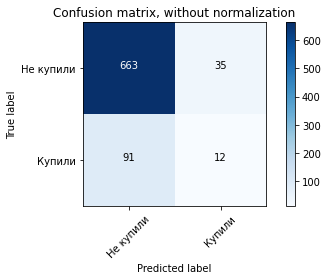

<function __main__.plot_con(threshold)>

In [671]:
widgets.interact(plot_con,
                 threshold=thr_hold)

In [672]:
from utils.metrics import get_feature_names

In [673]:
feature_names = get_feature_names(pipeline_resampled.named_steps['preprocessor']) # названия признаков как они указаны в пайплайне
feature_importance = []


for i, feature in enumerate(pipeline_resampled.steps[1][1].feature_importances_):
    feature_importance.append((feature_names[i], feature))
    
    
feature_importance.sort(key=lambda x:x[1], reverse=True)
feature_importance[:10]

[('numeric__quantity_skewness_60_days', 73),
 ('numeric__quantity_skewness_30_days', 51),
 ('numeric__retail_disc_sum_60_days', 51),
 ('numeric__retail_disc_skewness_60_days', 43),
 ('numeric__retail_disc_skewness_30_days', 40),
 ('numeric__retail_disc_median_30_days', 39),
 ('numeric__retail_disc_std_60_days', 39),
 ('numeric__quantity_sum_14_days', 37),
 ('numeric__retail_disc_quantile_75_60_days', 37),
 ('numeric__sales_value_sum_30_days', 34)]

In [674]:
def find_angle(x: np.array, y: np.array):
    inner = np.inner(x, y)
    norms = np.linalg.norm(x) * np.linalg.norm(y)
    cos = inner / norms
    rad = np.arccos(np.clip(cos, -1.0, 1.0))
    deg = np.rad2deg(rad)
    return(deg)


def find_inflection_point(data, x_col, y_col, num_examples, step=10):
    anlgle = None
    for i in range(0, num_examples, step):
        x_1 = data.iloc[i,  x_col]
        x_2 = data.iloc[i + step, x_col]
        y_1 = data.iloc[i, y_col]
        y_2 = data.iloc[i  + step, y_col]
        vect_1 = np.array([x_1 - x_2, y_1 - y_2])
        vect_2 = np.array([x_1 - x_2, 0.0])
        angle = find_angle(vect_1, vect_2)
        i += step
        if angle < 45.0:
            break
    return(int(i +  step / 2))

In [675]:
scores = prob_pred_resampled
scores = pd.DataFrame(scores)

scores['y'] = y_oot.values
scores_sorted = scores.sort_values(1, ascending=False)[[1, 'y']]
scores_sorted['cum_recall'] = scores_sorted['y'].cumsum()
scores_sorted['position'] = range(1, scores_sorted.shape[0]+1)
scores_sorted['recall_at'] = scores_sorted['cum_recall'] / scores_sorted['y'].sum()
scores_sorted['adj_position'] = scores_sorted['position'] / scores_sorted.shape[0]+1

scores.sort_values(1, ascending=False).head(10)

0         1  y
745  0.018745  0.981255  0
463  0.020564  0.979436  1
331  0.020721  0.979279  1
750  0.028003  0.971997  1
444  0.040358  0.959642  1
3    0.045617  0.954383  0
470  0.052091  0.947909  0
517  0.054511  0.945489  1
99   0.058972  0.941028  1
235  0.061126  0.938874  1

In [676]:
scores_sorted['recall_diff'] = scores_sorted['recall_at'].diff()
scores_sorted['position_diff'] = scores_sorted['adj_position'].diff()

scores_sorted.fillna(0, inplace=True)

scores_sorted['derivative'] = scores_sorted['position_diff']  / (scores_sorted['recall_diff']+1e-6)
scores_sorted['sum_derivative'] = scores_sorted['derivative'].cumsum()

scores_sorted.sort_values(1, ascending=False).head(10)

1  y  cum_recall  position  recall_at  adj_position  recall_diff  \
745  0.981255  0           0         1   0.000000      1.001248     0.000000   
463  0.979436  1           1         2   0.009709      1.002497     0.009709   
331  0.979279  1           2         3   0.019417      1.003745     0.009709   
750  0.971997  1           3         4   0.029126      1.004994     0.009709   
444  0.959642  1           4         5   0.038835      1.006242     0.009709   
3    0.954383  0           4         6   0.038835      1.007491     0.000000   
470  0.947909  0           4         7   0.038835      1.008739     0.000000   
517  0.945489  1           5         8   0.048544      1.009988     0.009709   
99   0.941028  1           6         9   0.058252      1.011236     0.009709   
235  0.938874  1           7        10   0.067961      1.012484     0.009709   

     position_diff   derivative  sum_derivative  
745       0.000000     0.000000        0.000000  
463       0.001248     0.128576        0.128576  
331       0.001248     0.128576        0.257152  
750       0.001248     0.128576        0.385728  
444       0.001248     0.128576        0.514304  
3         0.001248  1248.439451     1248.953755  
470       0.001248  1248.439451     2497.393205  
517       0.001248     0.128576     2497.521781  
99        0.001248     0.128576     2497.650357  
235       0.001248     0.128576     2497.778934

In [677]:
scores_sorted['recall_at'] = scores_sorted['cum_recall'] / scores_sorted['y'].sum()
scores_sorted['adj_position'] = scores_sorted['position'] / scores_sorted.shape[0]

<AxesSubplot:title={'center':'Кумулятивный recall'}, xlabel='adj_position'>

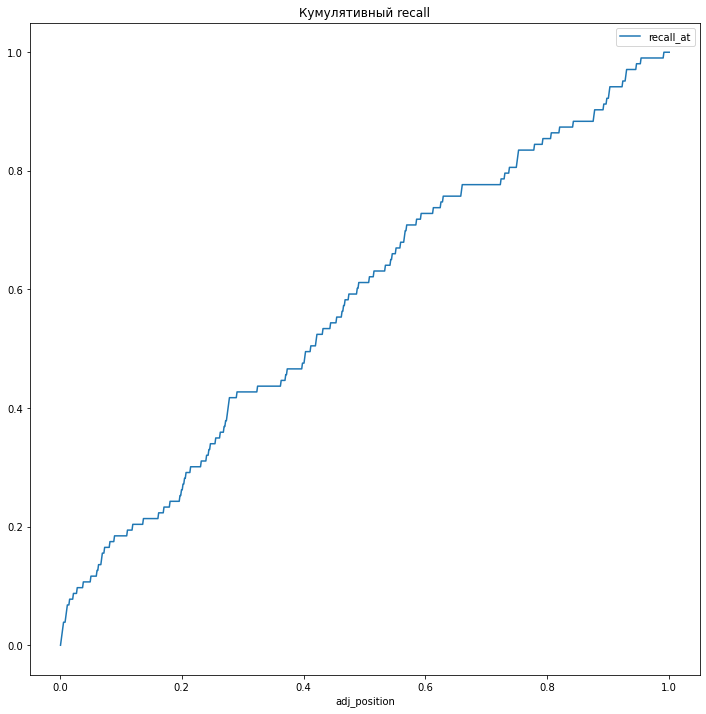

In [678]:
scores_sorted.plot(x='adj_position', y='recall_at', figsize=(12,12), title='Кумулятивный recall')

In [679]:
cutoff = find_inflection_point(scores_sorted, 5, 4, 801)

In [680]:
cutoff

45

In [681]:
cutoff = cutoff / scores_sorted.shape[0]

<br>
<h1>Практика 7</h1>
<h3>Скоринг клиентов</h3>

In [682]:
df_score = get_feature_matrix(orders_df,'2019-07-29')

In [683]:
X_score = df_score.drop(columns=['user_id'], axis=1)

In [684]:
# загрузим модель
with open(_FILEPATH, 'rb') as pickle_file:
    fitted_model = pickle.load(pickle_file)

In [685]:
scores = fitted_model.predict_proba(X_score)

In [686]:
# соберем скоры

In [687]:
score_df = pd.DataFrame()
score_df['customer_id'] = df_score.user_id
score_df['report_date'] = dt.date.today()
score_df['score'] = scores[:,1]

In [688]:
# наш топ клиентов, в отношении которых предполагается принять некоторые маркетинговые усилия

In [689]:
score_df.sort_values('score', ascending=False).iloc[:int(cutoff * score_df.shape[0]) +1, 0].values

array([ 840, 2322, 1041,  371, 1609, 1430, 2264,  239, 1453,  973, 1975,
        982, 1864, 1631, 2296, 2317,  707, 2479, 1935,  301, 2331,  771,
       1778, 1823,  688, 1527,  438, 1166, 2341,  242,  454, 1376,  889,
       1762, 1226, 2284, 2085, 1907,  324, 1795,  888,  949, 2134, 2076,
        513,  622])

<h3>Домашнее задание 4</h3>
<br>
Сформируйте выборку на произвольную дату в диапазоне с 1 сентября по 31 октября 2021 года, используя функцию get_feature_matrix, созданную на занятии. Постройте модель для любого таргета, собранного для заданий 1-3.<br>
<b><i>Подсказка</i></b>: функцию get_feature_matrix можно импоритировать из модуля utils для курса (from utils.data_prep import get_feature_matrix).

<h1>Бонус: проверка гипотез</h1>
<h3>Модель без балансировки классов в этой задаче работает лучше</h3>

In [690]:
# обучим модель без балансировки классов и протестируем ее на отложенной выборке

In [691]:
y = df['y']
X = df.drop(columns=['y', 'user_id'], axis=1)

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [693]:
categorical_features = X_train.select_dtypes(exclude=['Int64', 'float64']).columns.values
numeric_features = [feature for feature in list(X.columns) if feature not in categorical_features]

In [694]:
pipeline = create_pipeline(cat_features=categorical_features,
                          numer_features=numeric_features,
                          model=LGBMClassifier(objective = "binary", random_state = 42))

In [695]:
best = param_search(pipeline, X_train, y_train, search_space)

100%|██████████| 100/100 [02:08<00:00,  1.29s/trial, best loss: -0.6656144781144782]


In [696]:
best_params = unpack_model_params(best)

In [697]:
best_params

{'classifier__num_leaves': 64,
 'classifier__max_depth': 4,
 'classifier__learning_rate': 0.2508745543376414,
 'classifier__n_estimators': 750,
 'classifier__reg_alpha': 0.2909954052940017,
 'classifier__reg_lambda': 0.4633999032357813,
 'classifier__objective': 'binary',
 'classifier__random_state': 42,
 'classifier__n_jobs': 8}

In [698]:
# передадим лучшие параметры нашей модели
pipeline.set_params(**best_params)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['quantity_min_14_days',
                                                   'quantity_max_14_days',
                                                   'quantity_mean_14_days',
                                                   'quantity_median_14_days',
                                                   'quantity_std_14_days',
                                                   'quantity_sum_14_days',
                                                   'quantity_vals_range_14_days',
                                                   'quantity_quantile_25_14_day...
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['age_desc', 'income_desc', 'no_kids'], dtype=object))])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.2508745543376414, max_depth=4,
                                n_estimators=750, n_jobs=8, num_leaves=64,
                                objective='binary', random_state=42,
                                reg_alpha=0.2909954052940017,
                                reg_lambda=0.4633999032357813))])

In [699]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['quantity_min_14_days',
                                                   'quantity_max_14_days',
                                                   'quantity_mean_14_days',
                                                   'quantity_median_14_days',
                                                   'quantity_std_14_days',
                                                   'quantity_sum_14_days',
                                                   'quantity_vals_range_14_days',
                                                   'quantity_quantile_25_14_day...
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  array(['age_desc', 'income_desc', 'no_kids'], dtype=object))])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.2508745543376414, max_depth=4,
                                n_estimators=750, n_jobs=8, num_leaves=64,
                                objective='binary', random_state=42,
                                reg_alpha=0.2909954052940017,
                                reg_lambda=0.4633999032357813))])

In [700]:
y_pred = pipeline.predict(X_test)

In [701]:
prob_pred = pipeline.predict_proba(X_test)

In [702]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8507462686567164


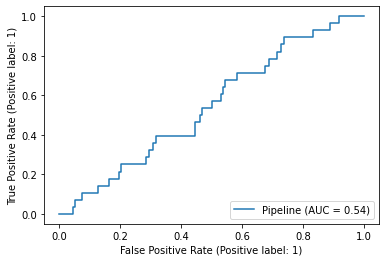

In [703]:
plot_roc_curve(pipeline, X_test, y_test)

In [704]:
# прогноз модели без балансировки
y_pred_oot = pipeline.predict(X_oot)
y_pred_prob_oot = pipeline.predict_proba(X_oot)

In [705]:
print(f'Accuracy: {accuracy_score(y_oot, y_pred_oot)}')

Accuracy: 0.8651685393258427


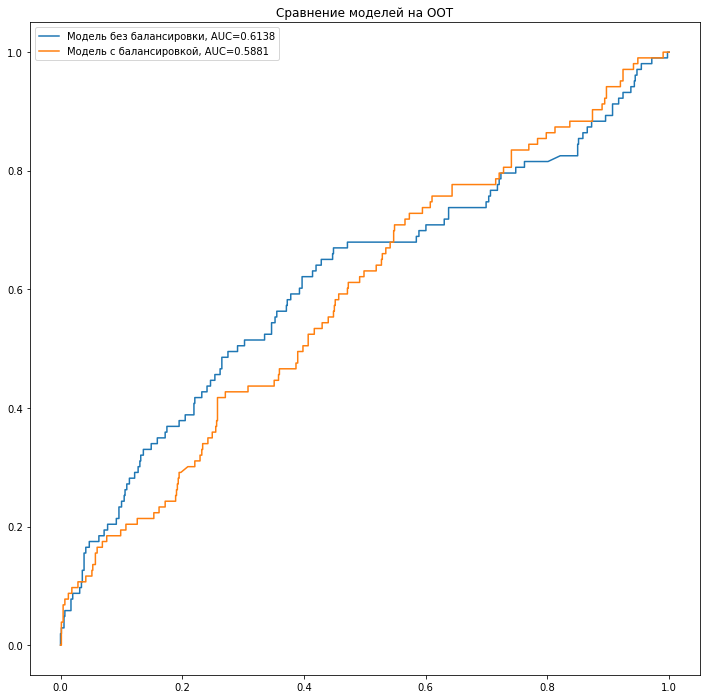

In [706]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(0, figsize=(12,12)).clf()

y_pred = y_pred_prob_oot[:, 1]
fpr, tpr, _ = roc_curve(y_oot, y_pred)
auc = round(roc_auc_score(y_oot, y_pred), 4)
plt.plot(fpr,tpr,label="Модель без балансировки, AUC="+str(auc))

y_pred = prob_pred_resampled[:, 1]
fpr, tpr, _ = roc_curve(y_oot, y_pred)
auc = round(roc_auc_score(y_oot, y_pred), 4)
plt.plot(fpr,tpr,label="Модель с балансировкой, AUC="+str(auc))

#add legend
plt.legend()
plt.title('Сравнение моделей на ООТ')
plt.show()